# Test notebook to evolve one single planet & plot its radius evolution

In [122]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy import constants as const

# adding github_platypos/subfolder to the system path
sys.path.append("/home/laura/Dropbox/PhD_2/Python_Projects/PLATYPOS/github_platypos_010422/")
import platypos
from platypos import Planet_LoFo14
from platypos import Planet_ChRo16
from platypos import Planet_Ot20
import platypos.planet_models_LoFo14 as plmoLoFo14
import platypos.planet_models_ChRo16 as plmoChRo16
#from platypos.lx_evo_and_flux import calculate_Lx_sat, l_high_energy

# # adding github_multitrack/subfolder to the system path
# sys.path.append('/home/laura/Dropbox/PhD_2/Python_Projects/PLATYPOS/github_multitrack_010422/')
# import multitrack.keplers_3rd_law as kepler3
# import multitrack.get_ExoplanetEU_data as exoEU
# from multitrack.complete_track_dict import complete_track_dict, complete_track_dict_noplobj

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Create stellar evolutionary track

track_dict = <br>
{"t_start",  "t_curr", "t_5Gyr", <br>
"Lx_max", "Lx_curr", "Lx_5Gyr", <br>
"t_sat", "dt_drop", "Lx_drop_factor"}<br>

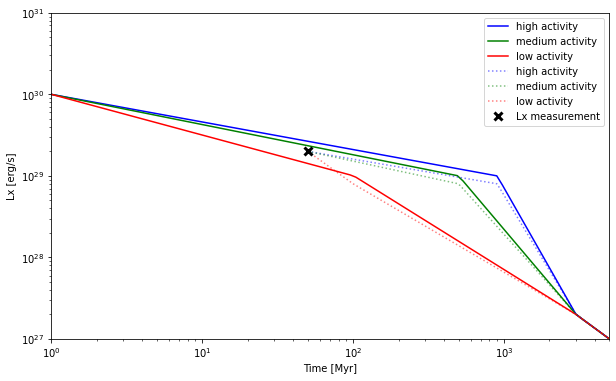

In [11]:
# dummy tracks from 1 Myr to 5 Gyr for a 0.5 solar mass star
# values approximated to match Fig.11 of Johnstone 2020

# values based on a 0.5 solar mass host star 
t1Gyr = 1e3
Lx1Gyr = 2.5e28
t1Gyr = 3e3
Lx1Gyr = 2e27

t5Gyr = 5e3
Lx5Gyr = 1e27
Lx_sat = 1e30


track_dict_low = {"t_start": 1., "Lx_max": Lx_sat, "t_sat": 1., "dt_drop": 1e2, "Lx_drop_factor": 10.,
                "t_curr": t1Gyr, "Lx_curr": Lx1Gyr, "t_5Gyr": t5Gyr, "Lx_5Gyr": Lx5Gyr}
track_dict_med = {"t_start": 1., "Lx_max": Lx_sat, "t_sat": 1., "dt_drop": 5e2, "Lx_drop_factor": 10.,
                "t_curr": t1Gyr, "Lx_curr": Lx1Gyr, "t_5Gyr": t5Gyr, "Lx_5Gyr": Lx5Gyr}
track_dict_high = {"t_start": 1., "Lx_max": Lx_sat, "t_sat": 1., "dt_drop": 9e2, "Lx_drop_factor": 10.,
                "t_curr": t1Gyr, "Lx_curr": Lx1Gyr, "t_5Gyr": t5Gyr, "Lx_5Gyr": Lx5Gyr}


times = np.geomspace(1, 5e3, 100)
Lx_high = np.array([lx_evo(t, track_dict_high) for t in times])
Lx_med = np.array([lx_evo(t, track_dict_med) for t in times])
Lx_low = np.array([lx_evo(t, track_dict_low) for t in times])

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(times, Lx_high, label="high activity", color='blue')
ax.plot(times, Lx_med, label="medium activity", color='green')
ax.plot(times, Lx_low, label="low activity", color='red')



# Now 'design' your own tracks based on your stellar age and corresponding X-ray measurement
# it is not exactly known, how late-type stars evolve, so I suggest 'designing' tracks that 
# roughly match with the works done by Johnstone 2020, or Magaudda 2020, or Peacock 2020 for M-dwarfs
age_star = 5e1
Lx_age = Lx_sat = 2e29


# values based on a 0.5 solar mass host star (approximation of Johnstone 2020 tracks, Fig. 11)
t1Gyr = 1.0e3
Lx1Gyr = 2.5e28
t1Gyr = 3.0e3
Lx1Gyr = 2.0e27

drop_factor = 2.5 # this is a fudge factor to make the tracks look like you want them to. play around with it. (does not need to be the same for all activity tracks)
track_dict_low = {"t_start": age_star, "Lx_max": Lx_sat, "t_sat": age_star, "dt_drop": (1e2-age_star), "Lx_drop_factor": drop_factor,
                "t_curr": t1Gyr, "Lx_curr": Lx1Gyr, "t_5Gyr": t5Gyr, "Lx_5Gyr": Lx5Gyr}
track_dict_med = {"t_start": age_star, "Lx_max": Lx_sat, "t_sat": age_star, "dt_drop": (5e2-age_star), "Lx_drop_factor": drop_factor,
                "t_curr": t1Gyr, "Lx_curr": Lx1Gyr, "t_5Gyr": t5Gyr, "Lx_5Gyr": Lx5Gyr}
track_dict_high = {"t_start": age_star, "Lx_max": Lx_sat, "t_sat": age_star, "dt_drop": (9e2-age_star), "Lx_drop_factor": drop_factor,
                "t_curr": t1Gyr, "Lx_curr": Lx1Gyr, "t_5Gyr": t5Gyr, "Lx_5Gyr": Lx5Gyr}


times = np.geomspace(age_star, 5e3, 100)
Lx_high = np.array([lx_evo(t, track_dict_high) for t in times])
Lx_med = np.array([lx_evo(t, track_dict_med) for t in times])
Lx_low = np.array([lx_evo(t, track_dict_low) for t in times])


ax.plot(times, Lx_high, label="high activity", color='blue', ls=':', alpha=0.5)
ax.plot(times, Lx_med, label="medium activity", color='green', ls=':', alpha=0.5)
ax.plot(times, Lx_low, label="low activity", color='red', ls=':', alpha=0.5)


# mark your star
ax.plot(age_star, Lx_age, marker="x", ms=8, mew=3, color="black", ls='None', label='Lx measurement')

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(1e27,1e31)
ax.set_xlim(1,5e3)
ax.set_ylabel("Lx [erg/s]")
ax.set_xlabel("Time [Myr]")
ax.legend();

# Create a planet object
- Chen & Rogers planet models
- Lopez & Fortney planet models
- (Otegi models (based on mature mass-radius relation))

In [120]:
# need dictionary that contains the info about the star
dict_star = {'star_id': 'MdwarfXY', 'mass': 0.5, 'radius': None,
             'age': age_star, 'L_bol': 0.06, 'Lx_age': Lx_age}


# generate a planet object (need to know:
# the semi-major axis/distance to host star
# the observed planetary radius
# you need to estimate the core mass (then the code automatically selects the required envelope mass fraction to match the observed radius)

# example planet
planet = {"radius": 3.3, "distance": 0.08, "core_mass": 4.0}


pl_a = Planet_LoFo14(dict_star, planet)
#pl_a.__dict__

pl_b = Planet_ChRo16(dict_star, planet)
pl_b.__dict__

{'star_id': 'MdwarfXY',
 'radius_star': None,
 'mass_star': 0.5,
 'age': 50.0,
 'Lbol': 2.2968e+32,
 'Lbol_solar': 0.06,
 'Lx_age': 2e+29,
 'Lx_sat_info': None,
 'Lx_sat_Lbol': None,
 'distance': 0.08,
 'core_comp': 'rock',
 'flux': 9.294199281285794,
 'flux_cgs': 12760935.613205394,
 't_eq': 487.02661746190876,
 'has_evolved': False,
 'planet_id': 'noname',
 'EUV_relation': None,
 'planet_type': 'ChRo16',
 'planet_info': 'Case 2 - obs. planet with radius, but no mass measurement, but core mass specified.',
 'core_mass': 4.0,
 'radius': 3.3,
 'core_radius': 1.430041140772368,
 'fenv': 4.609999999999924,
 'mass': 4.193311667889713,
 'density': 0.6411870580221435,
 'grav_potential': -794126353837.4479,
 'lambda_escape': 19.76459290069867,
 'radius_RL': 38.137400567767024,
 'period': 11.688073542991798}

In [119]:
# # Example planet - measured radius & mass estimate from Otegi et al. (2020)
# pl_c = Planet_Ot20(dict_star, planet)
# pl_c.__dict__

# Evolve & create outputs

In [114]:
# choose a way to estimate the beta parameter (effective XUV absorption radius)
# check beta_K_functions() for more details
beta_settings = {"beta_calc": "Salz16", "RL_cut": True, "beta_cut": False}
#beta_settings = {"beta_calc": "Lopez17", "RL_cut": True}
#beta_settings = {"beta_calc": "off"} # beta = 1

final_age = 1.0e5
epsilon = 0.1
track = track_dict_med # choose track

In [123]:
%%time

# LoFo14 planet
folder_id = "Planet_a"
path_save = os.path.join(os.getcwd(), folder_id+"/")
if not os.path.exists(path_save):
    os.makedirs(path_save)
else:
    os.system("rm -r " + path_save[:-1])
    os.makedirs(path_save)

pl_a.evolve_forward_and_create_full_output(t_final=final_age, initial_step_size=0.1,
                                         epsilon=epsilon, K_on="yes",
                                         relation_EUV='Johnstone', # 'SanzForcada', 'Linsky'
                                         mass_loss_calc='Elim', # 'Elim_and_RRlim','HBA'
                                         beta_settings=beta_settings,
                                         evo_track_dict=track_dict_low,
                                         path_for_saving=path_save,
                                         planet_folder_id=folder_id)
df_pl_a = pl_a.read_results(path_save)

# ChRo16 planet
folder_id = "Planet_b"
path_save = os.path.join(os.getcwd(), folder_id+"/")
if not os.path.exists(path_save):
    os.makedirs(path_save)
else:
    os.system("rm -r " + path_save[:-1])
    os.makedirs(path_save)
pl_b.evolve_forward_and_create_full_output(t_final=final_age, initial_step_size=0.1,
                                         epsilon=epsilon, K_on="yes",
                                         relation_EUV='Johnstone', # 'SanzForcada', 'Linsky'
                                         mass_loss_calc='Elim', # 'Elim_and_RRlim','HBA'
                                         beta_settings=beta_settings,
                                         evo_track_dict=track_dict_low,
                                         path_for_saving=path_save,
                                         planet_folder_id=folder_id)
df_pl_b = pl_b.read_results(path_save)

# Ot20 planet
# folder_id = "Planet_c"
# path_save = os.path.join(os.getcwd(), folder_id+"/")
# if not os.path.exists(path_save):
#     os.makedirs(path_save)
# else:
#     os.system("rm -r " + path_save[:-1])
#     os.makedirs(path_save)

# pl_c.evolve_forward_and_create_full_output(t_final=final_age, initial_step_size=0.1,
#                                          epsilon=epsilon, K_on="yes",
#                                          relation_EUV='Johnstone', # 'SanzForcada', 'Linsky'
#                                          mass_loss_calc='Elim', # 'Elim_and_RRlim','HBA'
#                                          beta_settings=beta_settings,
#                                          evo_track_dict=track_dict_low,
#                                          path_for_saving=path_save,
#                                          planet_folder_id=folder_id)
# df_pl_c = pl_c.read_results(path_save)

CPU times: user 15.4 s, sys: 3.87 ms, total: 15.4 s
Wall time: 15.4 s


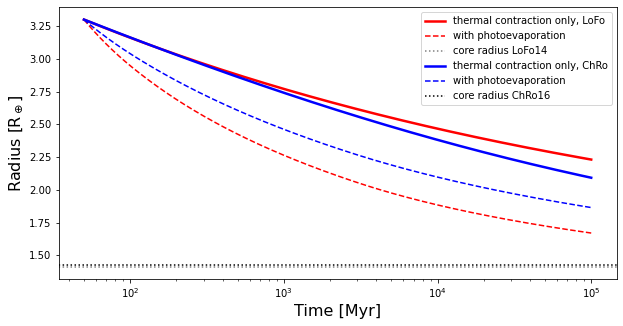

In [124]:
fig, ax = plt.subplots(figsize=(10,5))

pl, df_pl = pl_a, df_pl_a
if pl.planet_type == 'LoFo14':
    ax.plot(df_pl["Time"], plmoLoFo14.calculate_planet_radius(pl.core_mass, pl.fenv, df_pl["Time"], pl.flux, pl.metallicity), \
            lw=2.5, label='thermal contraction only, LoFo', color="red")
elif pl.planet_type == 'ChRo16':
    ax.plot(df_pl["Time"], plmoChRo16.calculate_planet_radius(pl.core_mass, pl.flux, pl.flux, df_pl["Time"]), \
            lw=2.5, label='thermal contraction only, ChRo', color="red")
ax.plot(df_pl["Time"], df_pl["Radius"], 
        marker="None", ls="--", label='with photoevaporation', color="red")
xlim = ax.get_xlim()
ax.axhline(pl.core_radius, xlim[0], xlim[1], ls=':', color='grey', label='core radius LoFo14')

pl, df_pl = pl_b, df_pl_b
if pl.planet_type == 'LoFo14':
    ax.plot(df_pl["Time"], plmoLoFo14.calculate_planet_radius(pl.core_mass, pl.fenv, df_pl["Time"], pl.flux, pl.metallicity), \
            lw=2.5, label='thermal contraction only, LoFo', color="blue")
elif pl.planet_type == 'ChRo16':
    ax.plot(df_pl["Time"], plmoChRo16.calculate_planet_radius(pl.core_mass, pl.fenv, pl.flux, df_pl["Time"]), \
            lw=2.5, label='thermal contraction only, ChRo', color="blue") 
ax.plot(df_pl["Time"], df_pl["Radius"], 
        marker="None", ls="--", label='with photoevaporation', color="blue")
xlim = ax.get_xlim()
ax.axhline(pl.core_radius, xlim[0], xlim[1], ls=':', color='k', label='core radius ChRo16')


# pl, df_pl = pl_c, df_pl_c
# ax.plot(df_pl["Time"], df_pl["Radius"], 
#         marker="None", ls="--", label='with photoevaporation, Ot', color="orange")
# xlim = ax.get_xlim()
# ax.axhline(2.15, xlim[0], xlim[1], ls=':', color='k', label='core radius Ot')
    
ax.legend(fontsize=10)
ax.set_xlabel("Time [Myr]", fontsize=16)
ax.set_ylabel("Radius [R$_\oplus$]", fontsize=16)
ax.set_xscale('log')
#ax.set_ylim(5.15, 5.62)
plt.show()